## 1. 주제
Board game geek 이라는 보드게임 평론 사이트에서 평점에 영향을 끼치는 변수는 무엇인가?

## 2. 선정배경
우리나라에서 유독 부진했던 보드게임 시장은 해를 거듭할수록, 특히 최근 들어 하루가 다르게 엄청난 성장세를 보이는 시장이다. 하지만 한국에서의 해외 보드게임 진출작들은 대부분 큰 성과를 보이지 못하고 있다. 아직 해외시장에 대한 이해가 부족하기 때문이라고 생각하는데 이러한 해외 시장에서 어떤 보드게임들이 인기를 얻을 수 있을 지에 대한 주제로 프로젝트를 기획했다.

## 3. 목적 
보드게임 평점에 대한 회귀식을 만들어 새로 출시되는 보드게임이나 아직 보드게임 사이트에 등록되지 않은 보드게임들이 해외 시장에서 어떠한 반응을 보일 것인지 예측할 수 있다.
또한 보드게임긱 사이트의 평점은 판매에 큰 영향을 끼치기 때문에 해외에 출시할 게임을 선정하는데 도움을 줄 수 있을 것이다.

## 4. 수집 자료 출처 및 성격
### 1) 반응 변수
Geek rating = 보드게임 긱 사이트에서의 평점 관측 값 (단위 : 점)
각 설명변수에 의해 영향을 받는 변수로 13700개의 자료 중 무작위로 선정한 137개의 데이터이다.
[http://www.boardgamegeek.com](http://www.boardgamegeek.com)
### 2) 설명 변수

Num.voters 
Release.year
community
Playing   time
age
weight

### 3) 예상 결과
반응변수에 대한 양의 상관관계
Num voters, age, weight, playing time
반응변수에 대한 음의 상관관계
Release.year, community

어려운 게임일수록 평점을 높게 주는 경향이 있어 게임을 어렵게 많드는 변수를 양의 상관관계로 넣었다.
반대로 게임을 쉽게 만드는 변수는 음의 상관관계로 넣었다.

In [1]:
setwd('C:/Users/15U560/Desktop')

In [2]:
data <- read.csv(file="project.csv")
data <- data[,2:8] 
data.lm = lm(geek.rating~. , data[])

### 반응변수와 설명변수들 간의 산점도

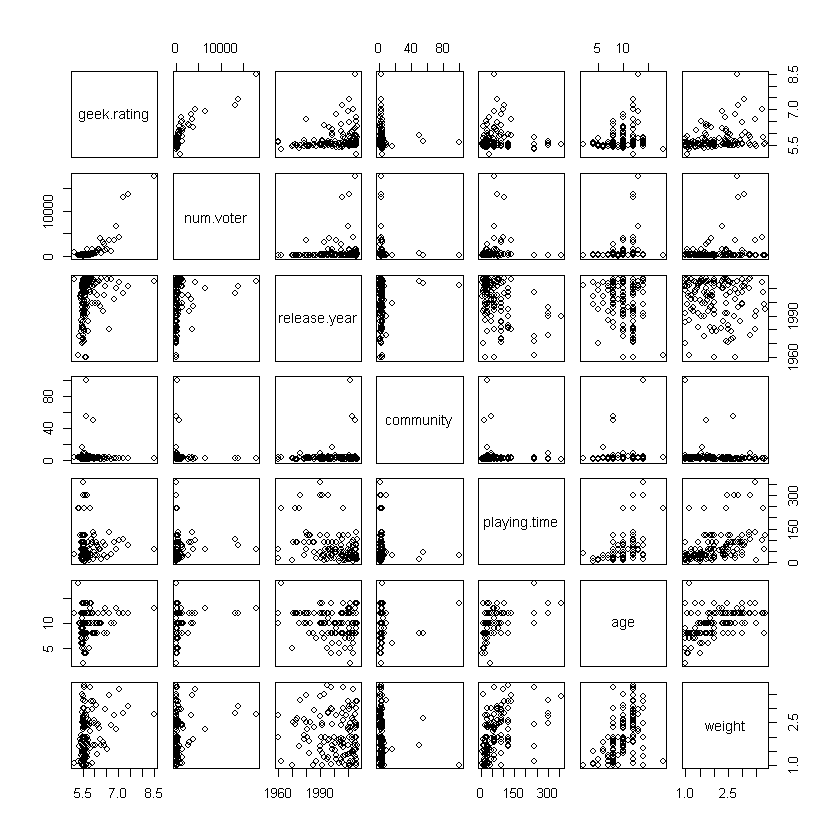

In [3]:
pairs(data)

### 설명변수 num.voter와 community 데이터의 최소와 최대값이 10이상 차이나기 때문에 로그변환을 취해서 space라는 자료를 만들면

In [4]:
data$lognum.voter = log(data$num.voter)
data$logcommunity = log(data$community)

### geek.rating을 y라 하고 lognum.voters, release.year, logcommunity, playing.time, age, weight,을 각각 x1, x2, x3, x4, x5, x6 이라 하자 

In [5]:
x1 = data$lognum.voter
x2 = data$release.year
x3 = data$logcommunity
x4 = data$playing.time
x5 = data$age
x6 = data$weight
y = data$geek.rating
space = data.frame(y,x1,x2,x3,x4,x5,x6)

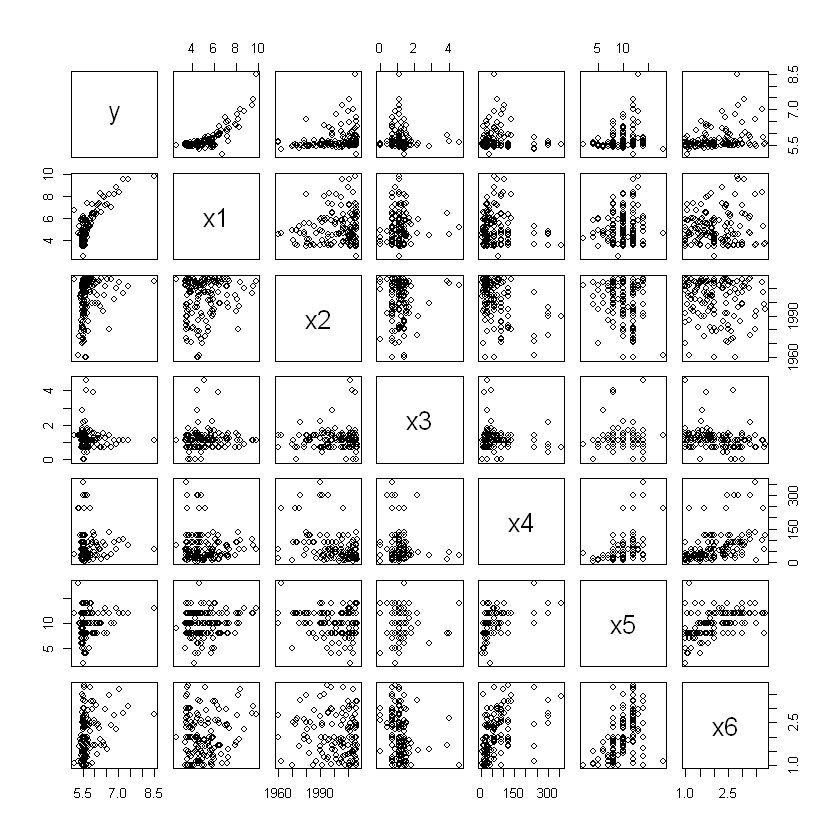

In [6]:
plot(space)

### 반응변수에 대해 num.voters는 양의 선형관계를 갖고 있고 나머지 설명변수는 선형관계를 갖고 있지 않는 것으로 보인다. 

**회귀계수의 추정치와 표준오차, 분산분석표, 결정계수 등의 통계값**

In [7]:
space.lm = lm(y~.,space)
summary(space.lm)


Call:
lm(formula = y ~ ., data = space)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85638 -0.11620  0.00169  0.10898  1.50117 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.6480808  3.1673251  -0.836   0.4047    
x1           0.2302662  0.0141801  16.239  < 2e-16 ***
x2           0.0034464  0.0015842   2.176   0.0314 *  
x3          -0.0381653  0.0341761  -1.117   0.2662    
x4          -0.0003472  0.0003886  -0.894   0.3732    
x5           0.0033865  0.0095253   0.356   0.7228    
x6           0.1613603  0.0341350   4.727 5.83e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2357 on 130 degrees of freedom
Multiple R-squared:  0.7287,	Adjusted R-squared:  0.7162 
F-statistic: 58.21 on 6 and 130 DF,  p-value: < 2.2e-16


In [8]:
anova(space.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x1,1,17.2480759,17.24807592,310.600191,2.898023e-36
x2,1,0.2247237,0.22472366,4.046782,4.632286e-02
x3,1,0.2835870,0.28358701,5.106783,2.549622e-02
x4,1,0.1693996,0.16939961,3.050517,8.307337e-02
x5,1,0.2274574,0.22745739,4.096011,4.503399e-02
x6,1,1.2408850,1.24088502,22.345630,5.833249e-06
Residuals,130,7.2190872,0.05553144,NA,NA


### 추정회귀식은 $\hat{y} = 0.2306973x1 + 0.0032439x2 -0.0315007x3 -0.0003280x4 + 0.0018216x5 + 0.1598282x6$

#### *`잔차의 산점도 : 표준화 잔차를 사용`*
#### *`잔차 대 설명변수들, 잔차 대 예측값, 잔차 대 관측순서, 정규확률도`*

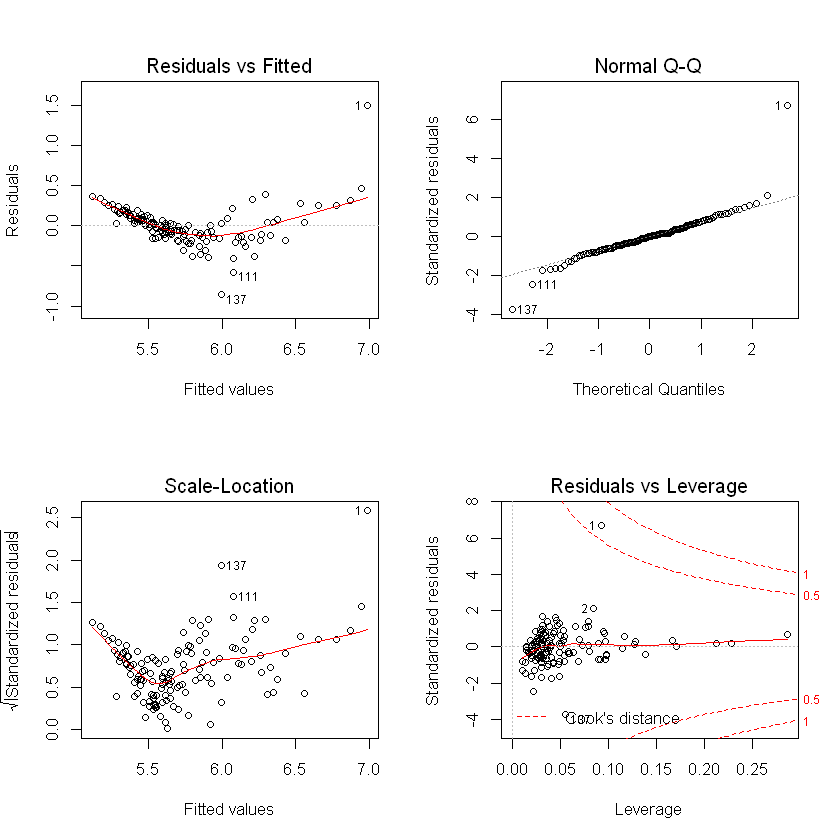

In [9]:
par(mfrow=c(2,2))
plot(space.lm)

### 왼쪽 상단과 왼쪽 하단의 그림이 특정한 경향을 보이므로 등분산성을 만족하지 않다고 볼 수 있다.
### 정규확률도에서 점들이 직선에 가깝게 분포하고 있으므로 정규성을 만족한다고 볼 수 있다.

*`잔차대 관측순서`*

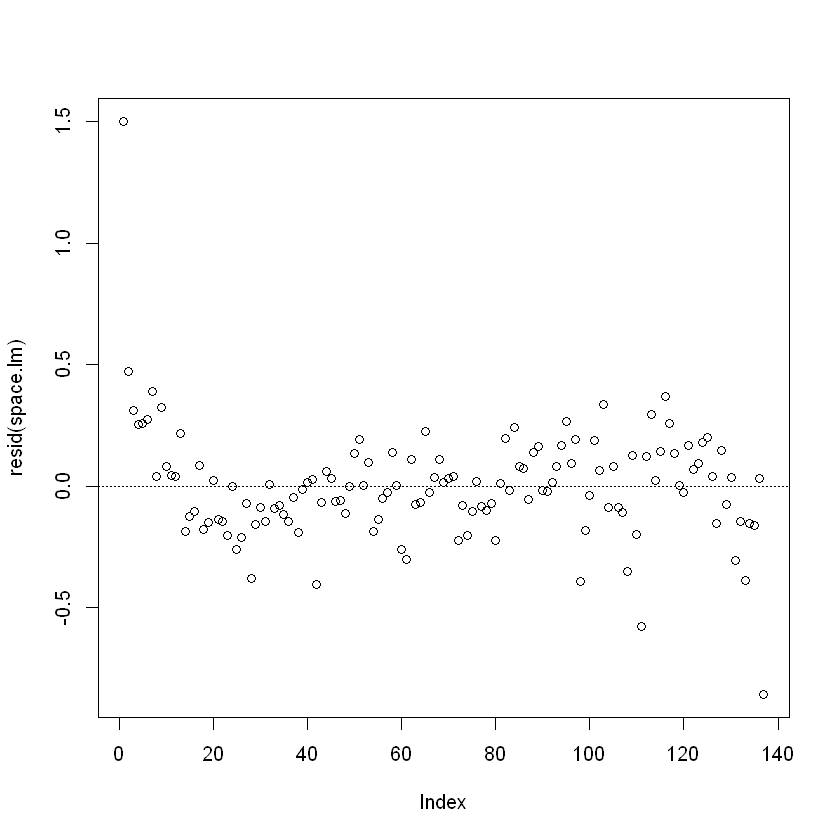

In [12]:
plot(resid(space.lm))
abline(h=0, lty=3)

*`잔차대 설명변수들`*

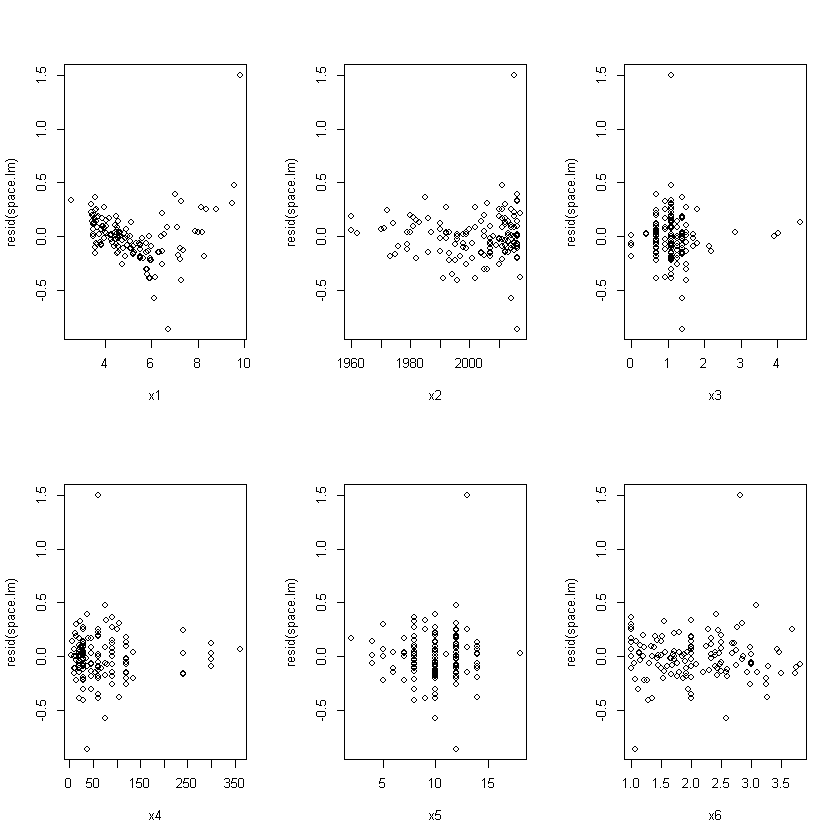

In [14]:
par(mfrow=c(2,3))
plot(resid(space.lm)~.,space[-1])

### 잔차 대 관측순서와 잔차대 설명변수들을 보아 점들이 특정한 경향을 띄고 있으므로 오차항에 대한 가정들이 타당하지 않다고 볼 수 있다.

*`다중공선성`*

In [15]:
(r = cor(space[2:7]))

,x1,x2,x3,x4,x5,x6
x1,1.00000000,0.16827487,0.09496794,-0.05723164,0.08772582,0.08298499
x2,0.16827487,1.00000000,0.06445090,-0.39424323,-0.17176268,-0.09989252
x3,0.09496794,0.06445090,1.00000000,-0.07284632,-0.01639884,-0.19640249
x4,-0.05723164,-0.39424323,-0.07284632,1.00000000,0.45582560,0.46202865
x5,0.08772582,-0.17176268,-0.01639884,0.45582560,1.00000000,0.47079864
x6,0.08298499,-0.09989252,-0.19640249,0.46202865,0.47079864,1.00000000


In [16]:
diag(solve(r))

x1       x2       x3       x4       x5       x6 
1.062862 1.227537 1.063234 1.635497 1.439432 1.518987

### 표본상관계수와 VIF의 값을 보니 다중공선성이 존재하지 않다는 것을 알 수 있다. 

In [17]:
eigen(r)$values

[1] 2.0960229 1.2097178 1.0163483 0.7439040 0.5078523 0.4261547

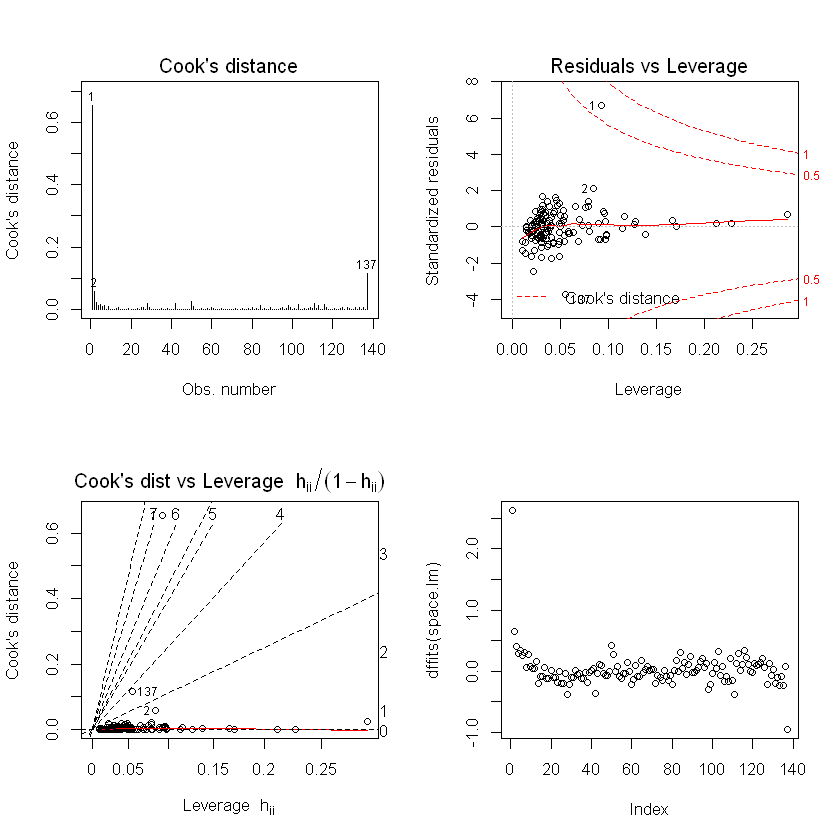

In [18]:
par(mfrow=c(2,2))
plot(space.lm,which=4:6)
plot(dffits(space.lm))

### 쿡의 거리 그림에서 기준값 3.67/(137-7)=0.028을 사용하였을 때 1, 137번째 관측값이 어느 정도 계수 추정량에 영향을 준다고 할 수 있다.
### DFFITS 그림에서 기준값 $2\sqrt{7/137}=0.45208$ 1번째와 137번째 관측치가 적합값 $\hat{y_i}$에 대한 영향력을 준다고 볼 수 있다.

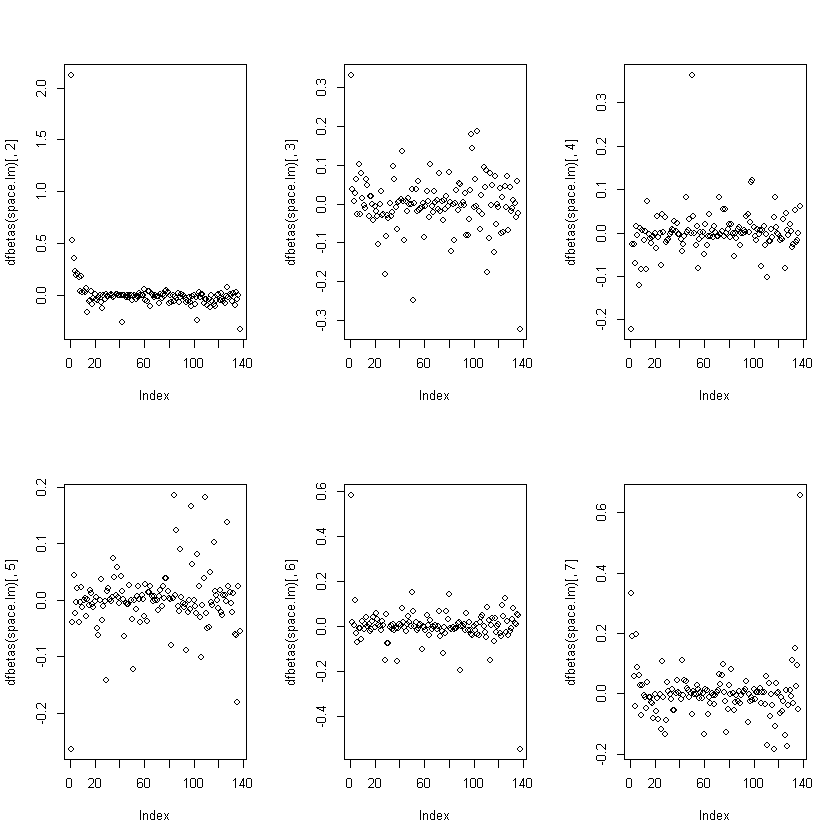

In [20]:
par(mfrow=c(2,3))
plot(dfbetas(space.lm)[,2])
plot(dfbetas(space.lm)[,3])
plot(dfbetas(space.lm)[,4])
plot(dfbetas(space.lm)[,5])
plot(dfbetas(space.lm)[,6])
plot(dfbetas(space.lm)[,7])

### DFBETAS 그림에서 기준값 $\frac{2}{\sqrt{137}}=0.17087$을 사용하였을 때 ‘x1’의 계수 추정값에는 1, 2, 3, 4, 5, 6, 9, 42, 103, 137번째 관측치들이, 
### ‘x2’의 경우에는 1, 28, 51, 98, 103, 111, 137번째 관측치들이, 
### ‘x3’의 경우에는 1, 50번째 관측치들이, 
### ‘x4’의 경우에는 1, 84, 109, 135번째 관측치들이, 
### ‘x5’경우에는 1, 64, 89, 137번째 관측치들이, 
### ‘x6’경우에는 1, 2, 3, 116, 137번째 관측치가 영향을 준다고 볼 수 있다.

In [22]:
model0=lm(y~1,space)
step(model0, scope = ~x1+x2+x3+x4+x5+x6,direction ="both")

Start:  AIC=-222.48
y ~ 1

       Df Sum of Sq     RSS     AIC
+ x1    1   17.2481  9.3651 -363.57
+ x6    1    2.6236 23.9896 -234.70
+ x2    1    1.3599 25.2533 -227.67
+ x5    1    0.7693 25.8439 -224.50
<none>              26.6132 -222.48
+ x3    1    0.0125 26.6007 -220.55
+ x4    1    0.0004 26.6129 -220.49

Step:  AIC=-363.57
y ~ x1

       Df Sum of Sq     RSS     AIC
+ x6    1    1.6372  7.7280 -387.89
+ x5    1    0.2650  9.1002 -365.50
+ x3    1    0.2585  9.1066 -365.40
+ x2    1    0.2247  9.1404 -364.90
<none>               9.3651 -363.57
+ x4    1    0.0479  9.3172 -362.27
- x1    1   17.2481 26.6132 -222.48

Step:  AIC=-387.89
y ~ x1 + x6

       Df Sum of Sq     RSS     AIC
+ x2    1    0.3926  7.3354 -393.04
+ x4    1    0.1865  7.5415 -389.24
<none>               7.7280 -387.89
+ x3    1    0.0627  7.6653 -387.01
+ x5    1    0.0087  7.7192 -386.05
- x6    1    1.6372  9.3651 -363.57
- x1    1   16.2617 23.9896 -234.70

Step:  AIC=-393.04
y ~ x1 + x6 + x2

       Df 


Call:
lm(formula = y ~ x1 + x6 + x2, data = space)

Coefficients:
(Intercept)           x1           x6           x2  
  -3.547851     0.229545     0.159527     0.003883  


### 단계별 회귀방법을 통해 최종모형을 설정하였다. 그리고 모형확인을 위해 PRESS 통계량을 이용하면

In [23]:
k = lm(y~x1+x6+x2,space)
anova(k)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x1,1,17.2480759,17.24807592,312.729641,9.720077e-37
x6,1,1.6371550,1.63715503,29.683711,2.382166e-07
x2,1,0.3925942,0.39259420,7.118234,8.579283e-03
Residuals,133,7.3353907,0.05515331,NA,NA


In [24]:
sum((resid(k)/(1-hatvalues(k)))^2)

[1] 8.156658

### SSE의 값이 7.4296으로 PRESS값 8.258996과 비슷하므로 예측의 정확도가 높다고 할 수 있고 따라서 최종모형을 새로운 자료에 적용할 수 있다고 판단된다.

# 분석 결론
### (1) 예상 결과와 분석 결과 비교
#### 반응변수에 대한 양의 상관관계
#### num voters, age, weight, Release year
#### 음의 상관관계
#### community, playing time

예상했던 결과와 달리 출시년도가 오래될수록 평점이 높아지고 플레이 인원수가 많아질수록 평점이 높아지는 것을 알 수 있다.

분석 후에 우리는 투표참여자수, 플레이인원수, 게임최소연령, 난이도의 여부에 따라 평점에 미치는 영향이 분석 전의 예상과 일치함을 알 수 있었다. 그와 달리 반면에 출시년도와 플레이타임에 대한 예상과 분석 결과는 다소 차이가 있었다. 특히 출시년도가 오래되었다고 해서 점수가 올라가기 보다는 떨어지는 것을 알 수 있었다. 한 심리학자가 말하길 게임을 하는 이유는 경쟁에서 이겨 쾌락을 추구하기 때문이라고 한다. 오래전에 나온 게임일수록 많은 공략법이 있고 rpg게임같은 경우에는 재화가 축적된다. 그래서 만일 오래된 게임을 새로하면 많은 공략법이 있는 상대를 이기기도, 이미 많은 재화를 모아둔 유저와 경쟁하기도 쉽지 않다는 것을 파악했다. 둘째로 최신게임 일수록 게임회사가 소비자의 욕구나 트렌디를 파악하여 만든다는 점이다. 이러한 점이 출시년도가 늦을수록 평점이 높아지는데 기여했다고 생각할 수 있다. 

### (2) 보드 게임의 해외 시장에서 좋은 성과를 내려면

이번 분석의 목적은 앞서 말하듯 해외 시장에서 부진하는 게임 회사에 이해를 높이기 위해 시작하였다. 통계적인 방법을 이용해 유용한 결과를 산출하면 다음 보드게임을 만드는데 도움이 될 것이다고 생각했다. 그리고 수집한 정보에 의해 회사가치와 같은 게임 외적인 부분에서 도움을 주기 보다는 게임 내에 포함되는 요소들을 바탕으로 제작하는데 도움을 주는데 주력할 것이다.
분석에서 알 수 있듯이 도움을 줄 수 있는 가장 좋은 팁은 난이도가 높을수록 평점이 좋다는 점이다. 이는 단순히 빠르게 움직이는 게임보다는 머리를 바탕으로 전략적으로 운영할 수 있는 게임이 더 좋은 평가를 받을 수 있음을 보여준다. 또한 너무 많은 플레이 인원수를 배정하기 보다는 소수의 사람들이 게임할 수 있어야 평점이 더 좋게 나올 수 있다.
물론 이런 사실은 게임 회사 말고도 새로운 게임을 시작하려는데 어떤 게임을 선택해야 할까?라는 물음에도 도움을 줄 수 있다. 본문처럼 중간중간 예외는 분명 존재할 수 있지만 게임이 어려울수록, 같이하는 사람이 적을수록, 출시일자가 최근일수록 좋은 평점을 받는 경향이 있음을 고려해줬으면 한다.